# __Построение графиков: Matplotlib__
Сначала импортируем требуемые модули.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Построим график $f(x) = \sin(\exp(x)) + 2 \cdot \ln(\sin(x^2)), 0 < x < 1$

In [2]:
xLeft, xRight = 0., 1.
numPoints = int(1e1)
xData = np.linspace(xLeft, xRight, numPoints)
yData = np.sin(np.exp(xData)) + 2.*np.log(1 + (xData**2)) # векторизованные функция и операция сложения из NumPy 

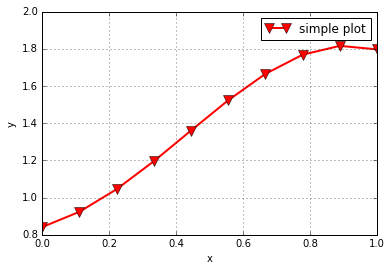

In [3]:
plt.figure() # создает пустое графическое окно
plt.plot(xData, yData, 'r-v', label='simple plot', linewidth=2, markersize = 10) # 'b-o'

plt.grid('on') # очевидно
plt.legend() # отобразит label в легенду
plt.xlabel('x')
plt.ylabel('y')
plt.show() # иначе окно не отобразится

## __2D-графики__

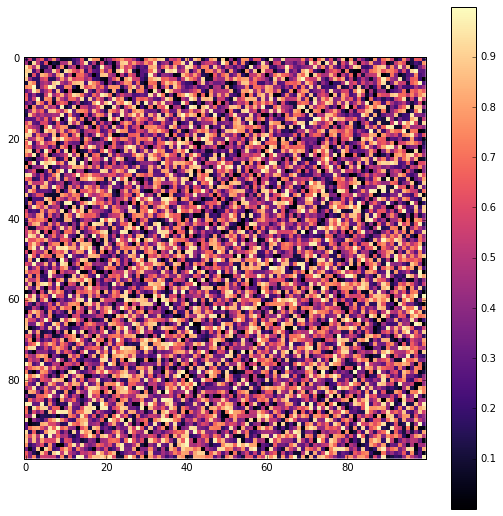

In [4]:
from numpy import random as rdn # импортируем функции вычисления псевдослучайных чисел

xyData = rdn.rand(100,100) # матрица 100x100, заполненная числами от 0 до 1 согласно равномерному распределению

plt.figure(figsize=(9,9))
plt.imshow(xyData, interpolation='none', cmap='magma') # cmap='jet' по-умолчанию
plt.colorbar()
plt.show()

## __Классы и объекты__
__Класс__ = __Поля__ (переменные класса) + __Методы__ (функции класса, работающие с полями). Члены класса обычно делятся на __private__ (к ним имеют доступ только методы класса, обычно это поля) и __public__ (доступны извне класса, обычно это методы). В Python таковое формальное разделение явно отсутствует (в отличие от С++), однако, имеется возмжность закрыть доступ извне для переменных - поставить перед именем префикс "двойное нижнее подчеркивание". Префикс "одинарное нижнее подчеркивание" не запрещает доступ извне, но показывает, что данное поле/метод класса трогать извне нельзя.

In [5]:
class Person:
    """TODO docstring"""
    def __init__(self, name): # функция-конструктор класса.
        self._name = name # инициализация private поля name в классе 
        print 'A person created'
    
    def SetAge(self, age_): 
        self._age = age_  # private поле age
    def GetAge(self): 
        return self._age
    
    def SetWeight(self, weight): 
        self._weight = weight # private
    def GetWeight(self): 
        return self._weight
    
    def TellSmth(self, speechString):
        print ('%s says: '% self._name) + speechString
        
    def PrintAge(self):
        print '%s is %d years old' % (self._name, self._age)

__Конструктор__ - функция, вызывающаяся для создания экземпляра класса - __объекта__. Объявление и инициализация переменных происходит внутри методов класса. Во всех методах класса в качестве 1-го аргумента должна явно указываться ссылка на собственный создаваемый объект (__self__). При вызове методов данный аргумент не указывается, он передается неявно.

Пример использования класса:

In [6]:
# создаем списки персонажей и фраз
names = ['Harry', 'Hermione', 'Ron', 'Newt']
phrases = ['Expelliarmus!', 'Vingardium Leviosa!', 'Accio!', 'Petrificus Totalus!']

persons = [] # создаем пустой список для соответсвующих объектов

# проходимся по списку имен
for name in names:
    persons.append(Person(name)) # присоединяем объекты к списку
    
print '\n',

# одновременно проходимся по спискам имен и соответсвующих фраз, в цикле выводим последние 
for person, phrase in zip(persons, phrases):
    person.TellSmth(phrase)
    
print '\n'


persons[1].SetAge(23)
persons[1].PrintAge()
    
# делаем то же самое, но получаем доступ к полю извне
# ошибки не возникает, но так все равно лучше не делать в целях безопасности
print persons[1]._age

A person created
A person created
A person created
A person created

Harry says: Expelliarmus!
Hermione says: Vingardium Leviosa!
Ron says: Accio!
Newt says: Petrificus Totalus!


Hermione is 23 years old
23


## __Классы и наследование__
__Наследование__ позволяет избежать повторения кода при расширении функциональности программы путем использования ранее написанного кода. Рассмотрим данный механизм, создав __дочерний__ класс __Scientist__ на основе класса __Person__. Часть методов в классах наследниках зачастую приходится реализовывать по-другому (переопределять) - это обеспечивается свойством __виртуальности__ методов.

In [7]:
class Scientist(Person):  # родительский класс указывается в скобках
    
    # переопределеие конструктора т.к. требуется ввести новое поле numPapers
    def __init__(self, name):
        
        # мы не хотим повторяться...
        '''
        self.__name = name_
        print 'A person created'
        '''
        
        Person.__init__(self, name) # ...поэтому явно вызываем конструктор родительского класса,
                                     # чтобы не повторять уже написанные инифциализации полей
        # дописываем произвольный код
        self._listOfPapers = []
        self._numPapers = len(self._listOfPapers)
        
        
    
    ''' # Все методы родительского класса уже неявно присутствуют в дочернем классе
    def GetAge(self): 
        return self.age
    def SetWeight(self, weight_): 
        self.weight = weight_
    def GetWeight(self): 
        return self.weight
    
    def TellSmth(self, speechString_):
        print ('%s says: '% self.name) + speechString_
    '''
    
    # переопределение функции из родительского класса (виртуальная функция)
    def SetAge(self, age):
        self._age = age
        if self._age >= 18:
            print 'Im a grown up scientist'
        
    
    # добавляем новые методы
    def SetNumPapers(self, numPapers): 
        self._numPapers = numPapers
    
    def GetNumPapers(self): 
        print '%s has published %d scientific papers' % (self._name, self._numPapers)
        return self._numPapers
    
    def PublishPaper(self, paperName):
        print '%s is published' % paperName
        self._numPapers += 1
        self._listOfPapers.append(paperName)

В Python все методы по-умолчанию являются виртуальными $\Rightarrow$ отсутствует надобность добавлять ключевое слово __virtual__ перед именем метода, как в С++.

In [8]:
# использование класса
listOfNames = ['Olga', 'Peter', 'Paul']
listOfScientists = []
listOfPapers = ['"New A-stable method for stiff ODE"', '"Modeling in-situ combustion"',\
                '"GPU-acceleration of cardiac modeling codes"']

for name in listOfNames:
    listOfScientists.append(Scientist(name))

i = 0
for scientist, paper in zip(listOfScientists, listOfPapers):
    scientist.SetNumPapers(i + 1)
    scientist.PublishPaper(paper)
    scientist.GetNumPapers()
    scientist.SetAge(i**2)
    scientist.PrintAge()
    i += 1

A person created
A person created
A person created
"New A-stable method for stiff ODE" is published
Olga has published 2 scientific papers
Olga is 0 years old
"Modeling in-situ combustion" is published
Peter has published 3 scientific papers
Peter is 1 years old
"GPU-acceleration of cardiac modeling codes" is published
Paul has published 4 scientific papers
Paul is 4 years old


## __Наследование и абстрактные классы__
Пусть перед нами стоит задача реализовать классы Кошка, Собака, Лиса, Сова. Пример реализации "в лоб":

In [9]:
class DemoCat():
    def __init__(self):
        self._isHungry = True  # поля, описывающие состояние животного
        self._isSleepy = True

    def Eat(self):
        self._isHungry = False

    def Sleep(self):
        self._isSleepy = False

    def MakeNoise(self):
        print 'Meow'

Аналогично создаем классы для остальных 3-х млекопитающих:

In [10]:
class DemoDog():
    def __init__(self):
        self._isHungry = True
        self._isSleepy = True

    def Eat(self):
        self._isHungry = False
        
    def Sleep(self):
        self._isSleepy = False

    def MakeNoise(self):
        print 'Woof'
            
class DemoFox():
    def __init__(self):
        self._isHungry = True
        self._isSleepy = True

    def Eat(self):
        self._isHungry = False

    def Sleep(self):
        self._isSleepy = False

    def MakeNoise(self):
        print 'Fyr-fyr'
            
class DemoOwl():
    def __init__(self):
        self._isHungry = True
        self._isSleepy = True

    def Eat(self):
        self._isHungry = False

    def Sleep(self):
        self._isSleepy = False

    def MakeNoise(self):
        print 'Uhu-uhu'

Видно, что функции, присущие всем животным, повторяются во всех классах, при этом впустую потратитось много места. Как этого избежать? Ответ: задействование механизмов наследования от абстрактного класса.
Создадим __абстрактный__ родительский класс животное, в котором будут определены функции init(), Eat(), Sleep(), общие для всех четвероногих. Функцию же MakeNoise() оставим __нереализованной__ в абстрактном классе, вместого этого реализуем ее в классах-наследниках. Подобные функции именуются __чисто виртуальными__.

Экземпляры абстрактного класса __не создаются__, т.к. идея абстрактности используются лишь как вспомогательный иструмент.

In [11]:
class AbstractAnimal(): # говорящее название; добавление слова Abstract не делает класс абстрактным!
    def __init__(self):
        self._isHungry = True # __isHungry с 2-мя подчеркиваниями не будет наследоваться
        self._isSleepy = True

    def Eat(self):
        self._isHungry = False

    def Sleep(self):
        self._isSleepy = False

    def MakeNoise(self): # а вот подобное - делает. Чисто виртуальная функция,
        raise NotImplementedError() # вызывающая специальное исключение

В языке существует 2 вида ошибок: __синтаксические ошибки__, возникающие при парсинге кода интерпретатором, и __исключения__, всплывающие при попытке исполнения верной синтаксической конструкции (например, операция деления на 0).

Далее в классах-наследниках реализуем (переопределим) соответствующую функцию MakeNoise().

In [12]:
class Cat(AbstractAnimal): 
    def MakeNoise(self):
        print 'Meow'
        
class Dog(AbstractAnimal):
    def MakeNoise(self):
        print 'Woof'
        
class Fox(AbstractAnimal):
    def MakeNoise(self):
        print 'Fyr-fyr'
        
class Owl(AbstractAnimal):
    def MakeNoise(self):
        print 'Uhu-uhu'

In [13]:
listOfAnimals = []
listOfAnimals.append(Cat())
listOfAnimals.append(Dog())
listOfAnimals.append(Fox())


for animal in listOfAnimals:
    animal.Eat()
    animal.MakeNoise()

Meow
Woof
Fyr-fyr


Также создадим класс __PetHolder__, который будет взаимодействовать с животными.

In [14]:
class PetHolder(Person):
        def __init__(self, name_):
                Person.__init__(self, name)
                self._isHappy = False # пока что в поисках питомца

        def ObtainAnimal(self, animal): # передаем животное-объект в качестве аргумента
                self.animal = animal

        def FeedAnimal(self):
                self.animal.Eat()
                self.animal.MakeNoise()
                self._isHappy = True
                print 'Im happy because I have my pet fed'
                

# использование класса
Peter = PetHolder('Peter'); cat1 = Cat()
Peter.ObtainAnimal(cat1)
Peter.FeedAnimal()

A person created
Meow
Im happy because I have my pet fed


Повторяюсь, что в языке не требуется явно указывать тип аргумента-животного в методе ObtainAnimal() - интерпретатор сам распознает тип при выполнении программы __(динамический полиморфизм__ или __полиморфизм времени исполнения)__ . Теоретически, в качестве животного можно даже попробовать передать класс AbstractAnimal().

В языке С++ для реализации подобной функциональности потребуется указать тип AbstractAnimal (не Cat/Dog/Fox/...) у аргумента animal, чтобы позволить функции работать сразу со всеми видами животных.

## __Вопросы?__

OOPython
Задача 1.
Телефонная книжка.

In [ ]:
class Person:
    def __init__(self):
        self.__name = ''
        self.__mobilePhoneNumber = []
        self.__workPhoneNumber = []
        self.__homePhoneNumber = ''
        self.__email = []
        self.__address = ''
        self.__skype = ''
        
    def SetName(self, name):
        self.__name = name
        
    def SetMobilePhoneNumber(self, number):
        self.__mobilePhoneNumber.append(number)
        
    def SetWorkPhoneNumber(self, number):
        self.__workPhoneNumber.append(number)
        
    def SetHomePhoneNumber(self, number):
        self.__homePhoneNumber.append(number)
        
    def DelMobilePhoneNumber(self, number):
        if number in self.__mobilePhoneNumber:
            self.__mobilePhoneNumber.remove(number)
        else:
            print('xer')
        
    def DelWorkPhoneNumber(self, number):
        if number in self.__workPhoneNumber:
            self.__workPhoneNumber.remove(number)
        
    def DelHomePhoneNumber(self, number):
        if number in self.__homePhoneNumber:
            self.__homePhoneNumber.remove(number)
    
    def SetAddress(self, address):
        self.__address = address
        
    def SetSkype(self, skype):
        self.__skype = skype
        
    def GetAllInformation(self):
        print(self.__name)
        print(self.__mobilePhoneNumber)
        print(self.__workPhoneNumber)
        print(self.__homePhoneNumber)
        print(self.__email)
        print(self.__address)
        print(self.__skype)